# Build Your first Neural Network with Google Colab


In [1]:
# Testing if the gpu is active

import tensorflow as tf

# display tf version and test if GPU is active

tf.__version__,tf.test.gpu_device_name()

('2.6.0', '/device:GPU:0')

# Classifying hand written digits

# Explore the Dataset

In [2]:
# Loading the dataset

from sklearn.datasets import load_digits

In [3]:
#get the data

digits = load_digits()

In [4]:
#Get available containers (or keys) from dataset

print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [5]:
#Create variables

data = digits.data
images = digits.images
targets = digits.target
target_names = digits.target_names
br = "\n" # create a newline variable

In [6]:
# display tensors information

print("data container:")
print(str(data.ndim) + "D tensor")
print(data.shape)
print(data.dtype,br)

print("image container:")
print(str(images.ndim) + "D Tensor")
print(images.shape)
print(images.dtype,br)

print("targets container:")
print(str(targets.ndim) + "D tensor")
print(targets.shape)
print(targets.dtype,br)

print("target names container:")
print(target_names)


data container:
2D tensor
(1797, 64)
float64 

image container:
3D Tensor
(1797, 8, 8)
float64 

targets container:
1D tensor
(1797,)
int64 

target names container:
[0 1 2 3 4 5 6 7 8 9]


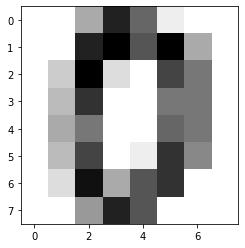

In [7]:
# Visualizing the first data element
#first image begins at index 0

image = images[0]
import matplotlib.pyplot as plt

plt.imshow(image,cmap="binary")
plt.show()

In [8]:
#Displaying the target value(or label) and the feature image (8x8 matrix) of the first image

#first digit begins at index 0

target = targets[0]
print("digits is:",target,br)


digits is: 0 



In [9]:
#image matrix of first image
print("image matrix: ",br)
print(image)

image matrix:  

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


# Split Data into Train-Test Sets

In [10]:
#Create variables to hold input dimensions

#input iamge dimensions

img_rows,img_cols = 8,8


In [11]:
# Reshape feature data
# Reshape

X = data.reshape(data.shape[0],img_rows,img_cols)
print("X reshaped: ",X.shape)
print("number of dim :" ,X.ndim)

X reshaped:  (1797, 8, 8)
number of dim : 3


In [12]:
y = targets
y.shape

(1797,)

In [13]:
# Now ready to split to train test
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.35,random_state=0)

In [15]:
#Alt we can use the images directly as shown 
X_alt = images
y_alt = targets

print("X: ",X_alt.shape)
print("number of dim:",X_alt.ndim)


X:  (1797, 8, 8)
number of dim: 3


In [16]:
X_tra, X_tes,y_tra,y_tes = train_test_split(X_alt,y_alt, test_size=0.33,random_state=0)

In [17]:
print("X_train:",X_tra.shape)
print("number of dims: ",X_tra.ndim)

train_percent = X_tra.shape[0] / X_alt.shape[0]
print("train data percent of X data:",train_percent)

print("X_test: ",X_tes.shape)
print("number of dim: ",X_tes.ndim)
test_percent = X_tes.shape[0] / X_alt.shape[0]
print("test data percent of X data:",test_percent)
num_images = X_tra.shape[0] + X_tes.shape[0]
print("total number of images:",num_images)

X_train: (1203, 8, 8)
number of dims:  3
train data percent of X data: 0.669449081803005
X_test:  (594, 8, 8)
number of dim:  3
test data percent of X data: 0.330550918196995
total number of images: 1797


# Build the input Pipeline

In [18]:
X_train.dtype, y_train.dtype

(dtype('float64'), dtype('int64'))

In [19]:
# Scale train and test feature data

# scale by dividing by the number of pixels in an image

s_train = X_train / 255.0
s_test = X_test / 255.0

In [20]:
#Create data objects for TensorFlow consumption

train_dataset = tf.data.Dataset.from_tensor_slices((s_train,y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((s_test,y_test))

In [21]:
#Viewing the tensors 
print("train: ",train_dataset)
print("test: ", test_dataset)

train:  <TensorSliceDataset shapes: ((8, 8), ()), types: (tf.float64, tf.int64)>
test:  <TensorSliceDataset shapes: ((8, 8), ()), types: (tf.float64, tf.int64)>


# Explore TensorFlow Data

In [22]:
#Display a slice from the first feature image and it's target from the train set

for feature, label in train_dataset.take(1):
  print(feature[0],br)
  print(label)

tf.Tensor(
[0.         0.         0.         0.00392157 0.04313725 0.05490196
 0.01960784 0.        ], shape=(8,), dtype=float64) 

tf.Tensor(1, shape=(), dtype=int64)


In [23]:
#Grabbing the first 2 labels from the test set

for _, label in test_dataset.take(2):
  print(label)

tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


# Continue pipeline Construction

In [24]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100


In [25]:
train_ds = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_ds = test_dataset.batch(BATCH_SIZE)

In [26]:
#Viewing the new datasets

train_ds,test_ds

(<BatchDataset shapes: ((None, 8, 8), (None,)), types: (tf.float64, tf.int64)>,
 <BatchDataset shapes: ((None, 8, 8), (None,)), types: (tf.float64, tf.int64)>)

# Feedforward Neural Networks

In [27]:
#defining the input shape

for item in train_ds.take(1):
  s = item[0].shape

in_shape = s[1:]
in_shape

TensorShape([8, 8])

In [28]:
#import Libraries to build layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [29]:
#Build the model

model = Sequential([Flatten(input_shape=in_shape ),Dense(256,activation="relu"),Dense(10,activation="softmax")])

# Model Summary

In [30]:
#Using the summary method to display the characteristics of a model.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 19,210
Trainable params: 19,210
Non-trainable params: 0
_________________________________________________________________


# Complie the Model

In [31]:
#compile the model

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train the Model

In [32]:
#training the model

history = model.fit(train_ds,epochs=60,validation_data=(test_ds))

Epoch 1/60
19/19 [==============================] - 2s 8ms/step - loss: 2.2799 - accuracy: 0.1558 - val_loss: 2.2557 - val_accuracy: 0.2941
Epoch 2/60
19/19 [==============================] - 0s 3ms/step - loss: 2.2256 - accuracy: 0.5128 - val_loss: 2.2035 - val_accuracy: 0.6041
Epoch 3/60
19/19 [==============================] - 0s 3ms/step - loss: 2.1602 - accuracy: 0.7380 - val_loss: 2.1332 - val_accuracy: 0.7377
Epoch 4/60
19/19 [==============================] - 0s 3ms/step - loss: 2.0758 - accuracy: 0.7868 - val_loss: 2.0463 - val_accuracy: 0.7424
Epoch 5/60
19/19 [==============================] - 0s 3ms/step - loss: 1.9725 - accuracy: 0.8048 - val_loss: 1.9419 - val_accuracy: 0.7472
Epoch 6/60
19/19 [==============================] - 0s 3ms/step - loss: 1.8518 - accuracy: 0.7988 - val_loss: 1.8215 - val_accuracy: 0.7504
Epoch 7/60
19/19 [==============================] - 0s 3ms/step - loss: 1.7172 - accuracy: 0.8211 - val_loss: 1.6921 - val_accuracy: 0.7599
Epoch 8/60
19/19 [==

In [33]:
model.evaluate(test_ds)

10/10 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9380


[0.21229109168052673, 0.9379968047142029]

# Model History

In [34]:
# assign the training record to a variable

history_dict = history.history

In [35]:
#Display a list of the keys in the dictionary

keys = history_dict.keys()
print("keys:",keys,br)

keys: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']) 



In [36]:
#get the length of the dictionary so we can reference the final metric values

length = len(history_dict["loss"]) - 1

In [37]:
final_loss = history_dict["loss"][length]
final_loss_val = history_dict["val_loss"][length]
final_acc = history_dict["accuracy"][length]
final_acc_val = history_dict["val_accuracy"][length]
print("final loss(train/test):")
print(final_loss,final_loss,br)
print("final accracy(train/test):")
print(final_acc,final_acc_val)


final loss(train/test):
0.15614835917949677 0.15614835917949677 

final accracy(train/test):
0.9708904027938843 0.9379968047142029


In [38]:
# plotting the training and validation loss as well as the training and validation accuracy

import matplotlib.pyplot as plt


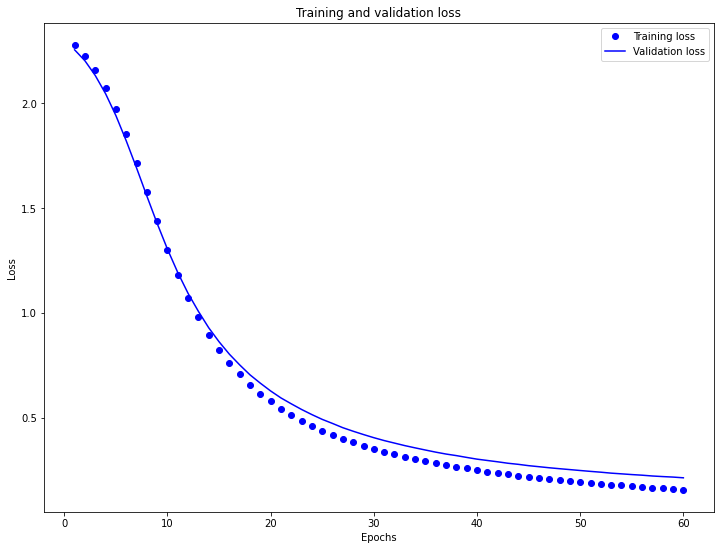

In [39]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1,len(acc)+1)

plt.figure(figsize=(12,9))
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

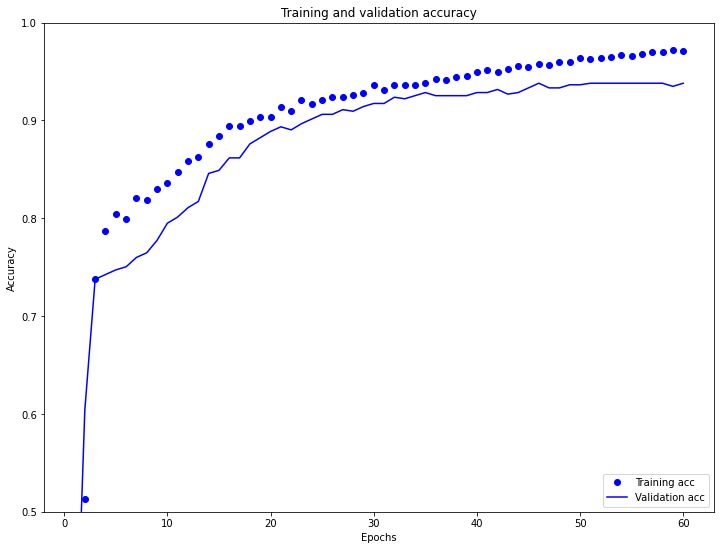

In [40]:
#clear previous figure

plt.clf()
plt.figure(figsize=(12,9))
plt.plot(epochs,acc,"bo",label="Training acc")
plt.plot(epochs,val_acc,"b",label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim((0.5,1))
plt.show()

# Predictions

In [41]:
# making predictions with the predict method on the test data

predictions = model.predict(test_ds)

In [42]:
#Viewing the first prediction at index 0

predictions[0]

array([6.9722191e-06, 6.4820895e-04, 9.9373698e-01, 3.8641873e-03,
       7.5645806e-07, 6.0726106e-05, 2.4871856e-06, 2.5246359e-04,
       1.3247507e-03, 1.0254193e-04], dtype=float32)

In [43]:
#Rounding to better view the highest probability
predictions[0].round(2)

array([0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
      dtype=float32)

In [44]:
#Using the following algorithm to elicit confidence in the first prediction

import numpy as np


In [45]:
confidence = 100*np.max(predictions[0])
print(str(np.round(confidence,2)) + "%")

99.37%


In [46]:
#Using this algorithm we predict the digit based on the first image in the test dataset

first_pred = np.argmax(predictions[0])
print("predicted:", first_pred)

predicted: 2


In [47]:
#Displaying the first label from the test dataset

print("actual: ",y_test[0])

actual:  2


In [48]:
#First five predictions based on test data:

print("first five predictions:",end="\n")
p5 = []

for i in range(5):
  p = predictions[i]
  v = np.max(p)
  p5.append(p.tolist().index(v))
  print(p5)

first five predictions:
[2]
[2, 8]
[2, 8, 2]
[2, 8, 2, 6]
[2, 8, 2, 6, 6]


In [49]:
# confidence in first five predictions:

print()

print("Confidence in our predictions:")
c = []

for i in range(5):
  conf = str(round(100*np.max(predictions[i]),2))
  c.append(conf)
  print(conf + "% for prediction:",p5[i])


Confidence in our predictions:
99.37% for prediction: 2
88.14% for prediction: 8
99.79% for prediction: 2
98.54% for prediction: 6
98.18% for prediction: 6


In [50]:
#first five predictions from test data

prediction_5 = [np.argmax(predictions[i]) for i,row in enumerate(p5)]

prediction_5

[2, 8, 2, 6, 6]

predicted: 2
actual:  2
99.37%


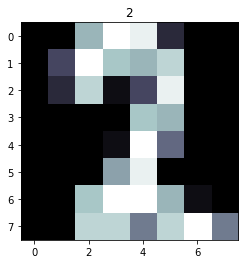


predicted: 8
actual:  8
88.14%


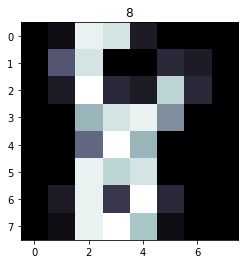


predicted: 2
actual:  2
99.79%


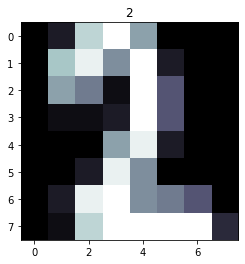


predicted: 6
actual:  6
98.54%


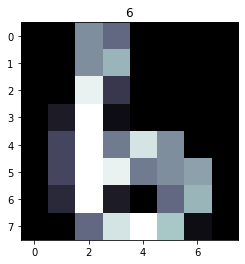


predicted: 6
actual:  6
98.18%


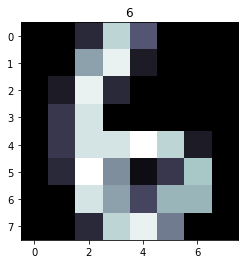

In [51]:
#display predicted digits, actual digits, confidences and images:

for i, row in enumerate(prediction_5):
  print("predicted:",target_names[row])
  print("actual: ", target_names[y_test[i]])
  print(str(c[i]) + "%")
  fig,ax = plt.subplots()
  image = ax.imshow(X_test[i],cmap="bone")
  plt.title(target_names[y_test[i]])
  plt.show()
  print()

# Mount Google Drive to Display an Image

In [52]:
!pip install Pillow

In [53]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


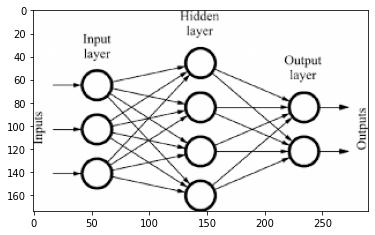

In [55]:
# path if the img on google drive
img_path = "gdrive/My Drive/Colab Notebooks/Figure0201.png"

from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(img_path)
plt.imshow(img)